In [1]:
%matplotlib inline
import numpy as np
import pandas as pd  
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#读入csv文件数据  
df = pd.read_csv('../resource/watermelon3.0alpha.csv')
df['intercept'] = 1.0  
df

,ID,density,Sugar_content,label,intercept
0,1,0.697,0.4600,1,1.0
1,2,0.774,0.3760,1,1.0
2,3,0.634,0.2640,1,1.0
3,4,0.608,0.3180,1,1.0
4,5,0.556,0.2150,1,1.0
5,6,0.403,0.2370,1,1.0
6,7,0.481,0.1490,1,1.0
7,8,0.437,0.2110,1,1.0
8,9,0.666,0.0910,0,1.0
9,10,0.243,0.0267,0,1.0


In [3]:
dataMat = np.array(df[['density','Sugar_content','intercept']].values[:,:])  

In [4]:
labelMat = np.mat(df['label'].values[:]).transpose()  

In [5]:
def sigmoid(z):  
    return 1.0 / (1 + np.exp(-z))  

In [6]:
def LogisticRegression(dataMat,labelMat):  
    m,n = np.shape(dataMat)  
    alpha = 0.05       # 步长
    iterations = 2000  # 最大迭代次数
    weights = np.array(np.array(np.ones((n,1))))  # 初始权重
    
    # 用梯度上升法更新权重
    for k in range(iterations):    
        z = np.dot(dataMat,weights)        
        error = labelMat - sigmoid(z)            
        weights = weights + alpha * np.dot(dataMat.transpose(),error)  
        
    return weights

In [7]:
def DrawResult(weights):  
    m = np.shape(dataMat)[0]  
    xcord1, ycord1, zcord1= [], [], []
    xcord2, ycord2, zcord2= [], [], []
    xcord3, ycord3, zcord3= [], [], []
    xcord4, ycord4, zcord4= [], [], []
    
    # 按照类别划分数据点
    for i in range(m):  
        if labelMat[i]==1:  
            z = sigmoid(dataMat[i,:] * weights)
            if z>= 0.5:
                xcord1.append(dataMat[i,0])  
                ycord1.append(dataMat[i,1]) 
                zcord1.append(z)
            else:
                xcord2.append(dataMat[i,0])  
                ycord2.append(dataMat[i,1]) 
                zcord2.append(z)
        else:  
            z = sigmoid(dataMat[i,:] * weights)
            if z< 0.5:
                xcord3.append(dataMat[i,0])  
                ycord3.append(dataMat[i,1]) 
                zcord3.append(z)
            else:
                xcord4.append(dataMat[i,0])  
                ycord4.append(dataMat[i,1]) 
                zcord4.append(z)
    
    # 创建三维图表
    fig = plt.figure()  
    ax = Axes3D(fig)
    
    # 画出判决平面
    x = np.arange(0.2,1.0,0.1)
    y = np.arange(0.0,0.6,0.1)
    X, Y = np.meshgrid(x, y)
    z = np.array([0.5 for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = z.reshape(X.shape)    
    ax.plot_surface(X, Y, Z, rstride=10, cstride=10, color=(0,0.6,0.6,0.1))
    
    # 按类别画出数据点
    ax.scatter(xcord1,ycord1,zcord1,s=30,c='red') 
    ax.scatter(xcord2,ycord2,zcord2,s=30,c='red',marker='x')  
    ax.scatter(xcord3,ycord3,zcord3,s=30,c='green') 
    ax.scatter(xcord4,ycord4,zcord4,s=30,c='green',marker='x')  
    
    ax.set_xlim(0.0,1.0)
    ax.set_ylim(-0.1,0.7)
    ax.set_zlim(-0.2,1.2)
    ax.set_xlabel('density')  
    ax.set_ylabel('Sugar content')
    ax.set_zlabel('Logit')
    plt.title('Gradient ascent logistic regression')
    plt.show()

In [8]:
weights = LogisticRegression(dataMat,labelMat)  

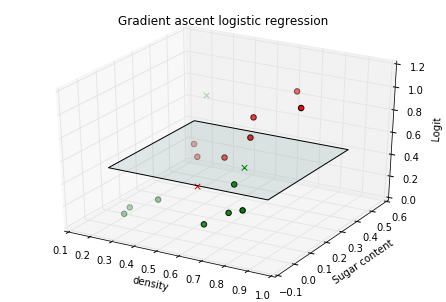

In [9]:
DrawResult(weights) 